In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("fetal_health.csv")
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   


In [3]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

gradient_boosting = GradientBoostingClassifier()
y_pred = cross_val_predict(gradient_boosting, X, y, cv=kf)


Accuracy =  94.73189087488241 %
Precision =  0.9192180864231988
Recall =  0.8955781378742104
F1-score =  0.9068536663291528


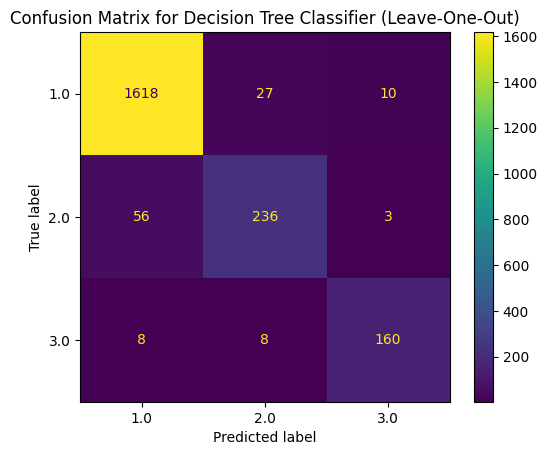

In [4]:



print("Accuracy = ", accuracy_score(y, y_pred) * 100, "%")
print("Precision = ", precision_score(y, y_pred,average='macro'))
print("Recall = ", recall_score(y, y_pred,average='macro'))
print("F1-score = ", f1_score(y, y_pred,average='macro'))

confusion = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for Decision Tree Classifier (Leave-One-Out)')
plt.show()

In [5]:
from sklearn.metrics import classification_report
report = classification_report(y, y_pred)
print(report)


              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97      1655
         2.0       0.87      0.80      0.83       295
         3.0       0.92      0.91      0.92       176

    accuracy                           0.95      2126
   macro avg       0.92      0.90      0.91      2126
weighted avg       0.95      0.95      0.95      2126



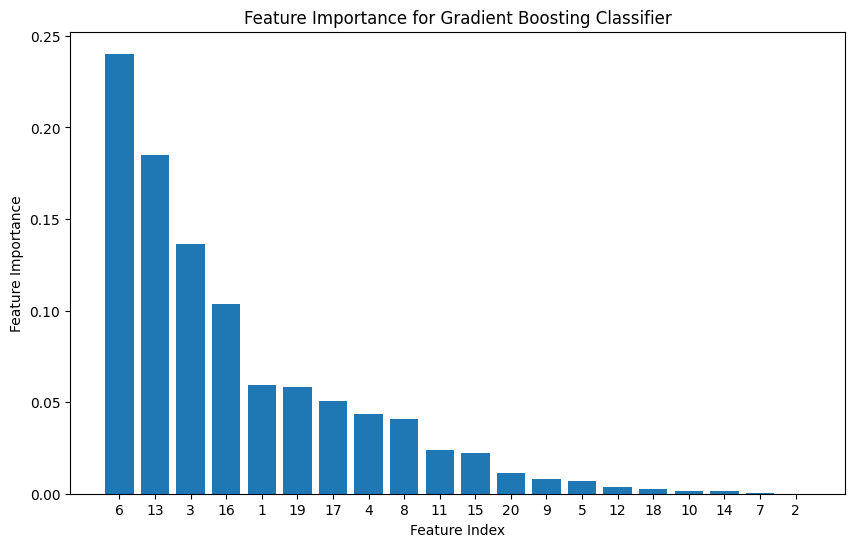

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generating some example data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fitting the model to the training data
gb_classifier.fit(X_train, y_train)

# Getting feature importances
feature_importances = gb_classifier.feature_importances_

# Sorting features based on their importance
sorted_features_indices = feature_importances.argsort()[::-1]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_features_indices])
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Gradient Boosting Classifier')
plt.xticks(range(X.shape[1]), sorted_features_indices + 1)  # Adding 1 to make indices start from 1
plt.show()


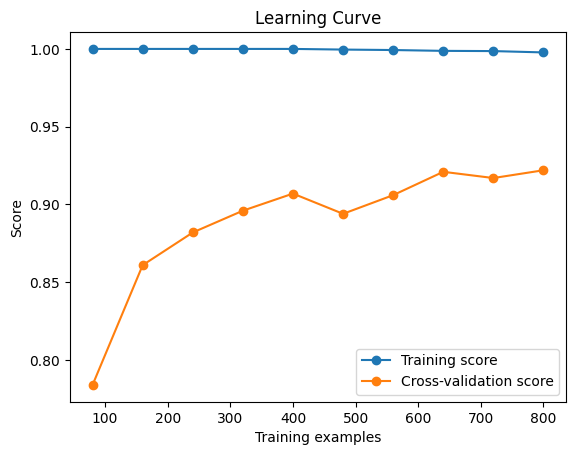

In [7]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(gradient_boosting, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()